# Introduction to Python for Image Analysis

Darvin Yi (darvinyi[at]Stanford.EDU)

0. Installing python
1. python data structures
2. reading in images
3. plotting
4. introduction to dicom
5. loops
6. functions

## For this course, just use anaconda.  It's very easy.

 [Anaconda](https://www.continuum.io/downloads) is a great platform built on top of python.

## Python data structures

The main ones to know:
1. list
2. tuple <- like an immutable list, use as function 
3. dictionary
4. sets

In [1]:
test_list = [] #creating empty list
print 'Empty list: ' + str(test_list)
test_list.append('a') #adding a to the list
print 'List with a: ' + str(test_list)
print 'Popping a: ' + str(test_list.pop()) + ', and now the list is ' + str(test_list)

Empty list: []
List with a: ['a']
Popping a: a, and now the list is []


In [2]:
test_list = [[1,2,3], [4,5,6], [7,8,9]] #list of lists
print 'List of lists: ' + str(test_list)
print 'First list in list of lists: ' + str(test_list[0])
print 'first element of first list in list of lists: ' + str(test_list[0][0])

List of lists: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
First list in list of lists: [1, 2, 3]
first element of first list in list of lists: 1


Tuples are like immutable lists.  You can still use it to store data, but you can't change how long it is.

Dictionaries are like hash tables.  It holds (key,value) pairs.  When you give it a key, you get back a value.

In [3]:
test_dict = {}
print 'Empty Dictionary: ' + str(test_dict)
test_dict[3] = 'dog'
test_dict[1] = 'cat'
test_dict[0] = 'rat'
test_dict[2] = 'pigeon'
print 'Discount Zoo: ' + str(test_dict)

Empty Dictionary: {}
Discount Zoo: {0: 'rat', 1: 'cat', 2: 'pigeon', 3: 'dog'}


In [4]:
# Let's order the zoo.
for key in sorted(test_dict):
    print (key, test_dict[key])

(0, 'rat')
(1, 'cat')
(2, 'pigeon')
(3, 'dog')


Sets allow you to do some really cool stuff too.  You shouldn't need it for this class though.  Do look it up on your own though.

## Reading in Images

For BASIC BASIC stuff, you need `numpy`, `scipy`, and `scikit-image`.

You can install them with:

```
sudo pip install numpy
sudo pip install scipy
sudo pip install scikit-image
```

In [5]:
import numpy as np
import scipy.misc

path_img = '20170407_figures/baboon.png'
img      = scipy.misc.imread(path_img)
print img

[[[164 150  71]
  [ 63  57  31]
  [ 75  43  10]
  ..., 
  [117 119  68]
  [141 170 101]
  [179 188 118]]

 [[120 125  62]
  [135  97  33]
  [ 55  35  23]
  ..., 
  [122 140  98]
  [136 159 128]
  [120 138  74]]

 [[ 99  74  31]
  [132 118  46]
  [ 60  41  36]
  ..., 
  [118  93  90]
  [ 87  91  77]
  [ 96  80  49]]

 ..., 
 [[121 148 155]
  [123 156 150]
  [124 150 139]
  ..., 
  [110  73  60]
  [ 90  93  70]
  [ 81  80  60]]

 [[126 169 168]
  [117 151 151]
  [121 136 133]
  ..., 
  [ 73  84  68]
  [ 99  69  86]
  [ 80  63  71]]

 [[  9  11  12]
  [ 10  12  11]
  [ 11  15  12]
  ..., 
  [  5   8   5]
  [  2   5   0]
  [  4   5   2]]]


In [6]:
# Dimensions of an image.
print img.shape

(512L, 512L, 3L)


# Plotting

We'll mainly be using `matplotlib.pyplot`.

(-0.5, 511.5, 511.5, -0.5)

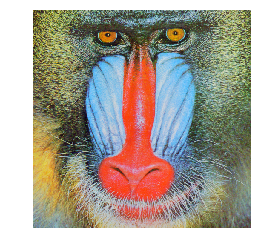

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img)
plt.axis('off')

You can also change how big the plot is or how many things you want to plot.

(-0.5, 511.5, 511.5, -0.5)

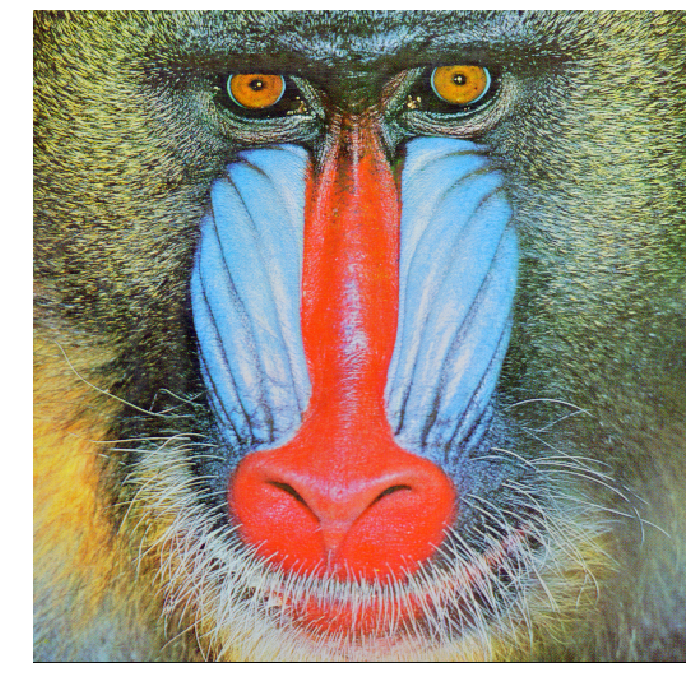

In [9]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.imshow(img)
plt.axis('off')

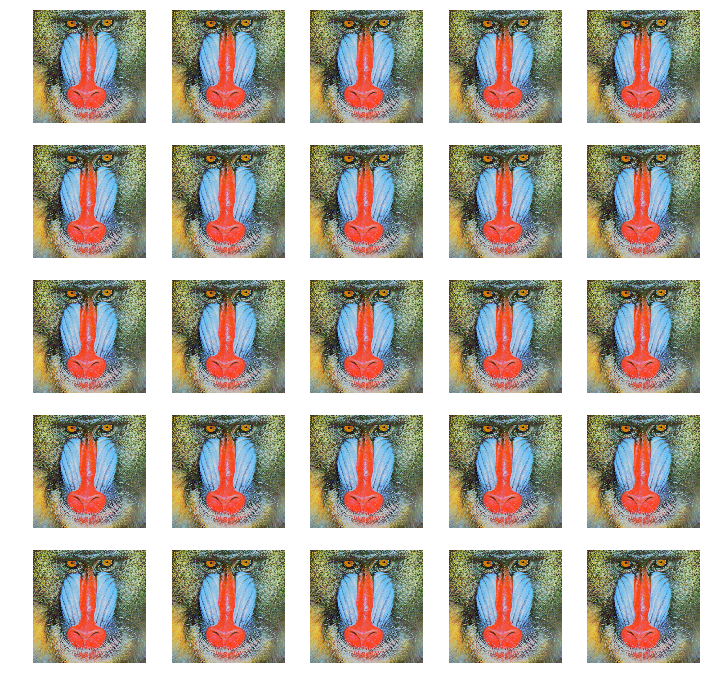

In [10]:
fig,ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(img)
        ax[i,j].axis('off')

You're data is stored as a numpy array.  If you've used `R` or `MATLAB`, accessing the array should feel very familiar.  If not, don't worry.  It's pretty intuitive.

For a color image, you'll make a RxCx3 size image.  The third dimension being size 3 is because of the color channels.

You can access values in two ways:
1. giving matrix coordinates
2. giving binary matrix with same size

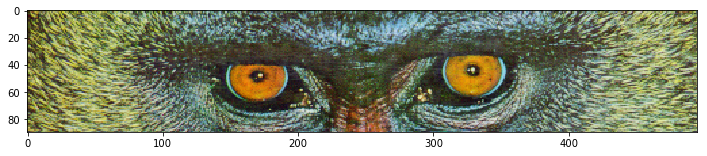

In [11]:
# Coordinates
img_crop = img[10:100, 5:500, :]
plt.imshow(img_crop)

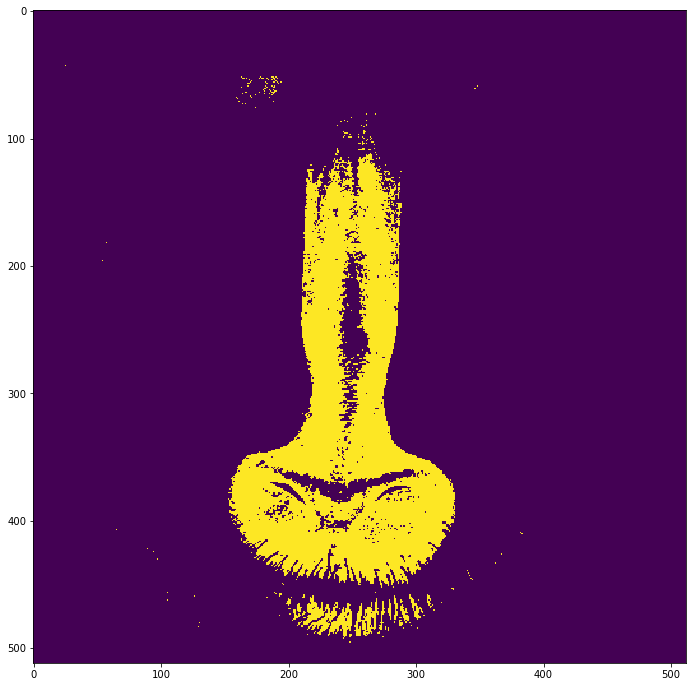

In [13]:
# Binary matrix
#Where is my image most red?
img = img.astype(np.float32)
img_red = (img[:,:,0] > 2*img[:,:,1]) & (img[:,:,0] > 2*img[:,:,2]) & (img[:,:,0] > 128)
plt.cla()
plt.imshow(img_red * 5)

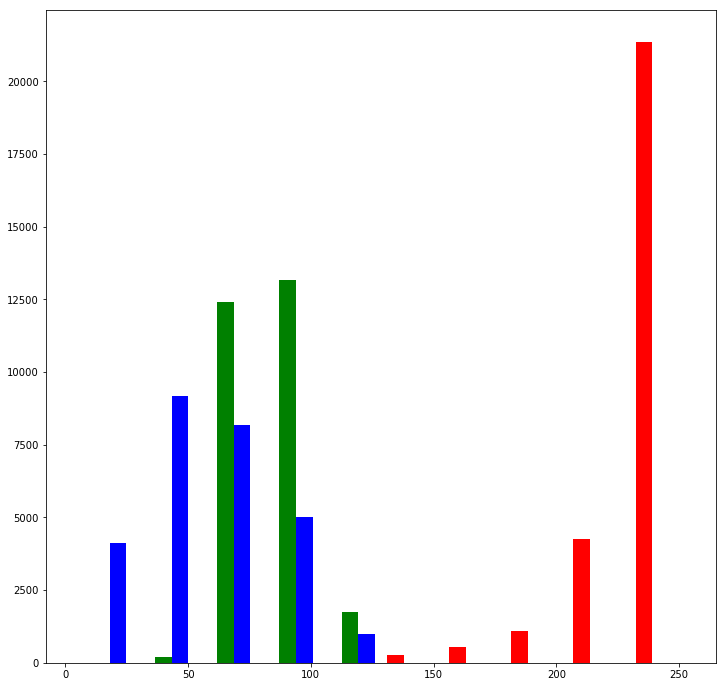

In [14]:
pixels_red = img[img_red]
_ = plt.hist(pixels_red,color=('red','green','blue'))

## Introduction to DICOM

DICOM properties:
- .dcm files
- has many fields (like an object)
- holds a lot of patient data (e.g. name, DoB, doctor name, etc...)
- holds a lot of scan information (e.g. model of scanner, angle of scan, etc...)
- holds pixel data

We can read in DICOM in Python with pydicom.  Install using

```
sudo pip install pydicom
```

Import using

```
import dicom
```

Let's take a look at the Kaggle data:

![](20170407_figures/sample_data.png)

And inside one of these folders is just a whole ton of ".dcm"'s.

![](20170407_figures/sample_data_2.png)


In [1]:
import dicom
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import join

%matplotlib inline

# Define Filepaths <- CHANGE THIS FOR YOUR COMPUTER
path_dcms = 'C:\\Users\\yidar\\Desktop\\kaggle_sample_data\\00cba091fa4ad62cc3200a657aeb957'#e'

# Print out all the .dcm's
list_dcms = listdir(path_dcms)
print str(list_dcms)

WindowsError: [Error 3] The system cannot find the path specified: 'C:\\Users\\yidar\\Desktop\\kaggle_sample_data\\00cba091fa4ad62cc3200a657aeb957/*.*'

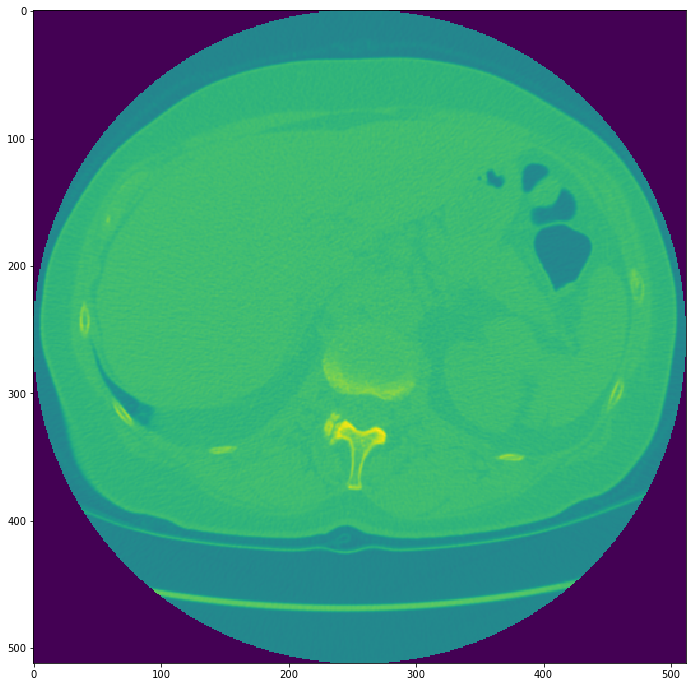

In [18]:
# let's just read in the first one.
name_dcm = list_dcms[0]
path_dcm = join(path_dcms, name_dcm)
dcm = dicom.read_file(path_dcm)

# Let's now display the image.
img = dcm.pixel_array
plt.rcParams['figure.figsize'] = (12, 12)
plt.imshow(img)

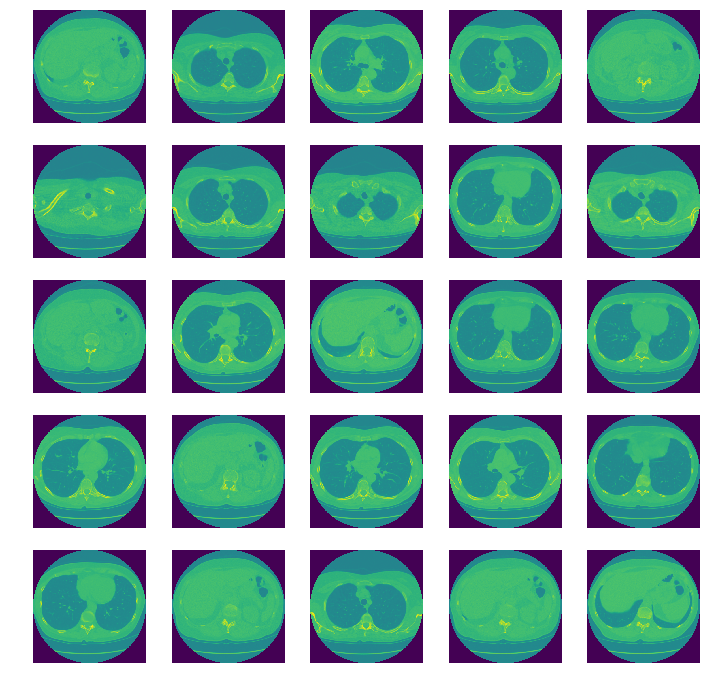

In [21]:
# let's read in a whole bunch of them.
fig,ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        name_dcm = list_dcms[(i*5+j)]
        path_dcm = join(path_dcms, name_dcm)
        dcm = dicom.read_file(path_dcm)
        img = dcm.pixel_array
        ax[i,j].imshow(img)
        ax[i,j].axis('off')

In [22]:
# Let's also see what's stored in the full dicom file.
print str(dcm)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.213969017333998168251084330775540157646
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0020) Patient ID                          LO: '00cba091fa4ad62cc3200a657aeb957e'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.86208730140539712382771890501772734277950692397709007305473
(0020, 000e) Series Instance UID                 UI: 2.25.11575877329635228925808596800269974740893519451784626046614
(0020, 0011) Series Number                       IS: '3'
(0020, 0012) Acquisition Number            

## Using loops

In [23]:
#Let's read in all the images and save the pixel data with InstanceNumber

dict_dcms = {}                          #initialize dictionary for dicoms
for name_dcm in list_dcms:              #iterate over all dicoms in folder
    path_dcm = join(path_dcms,name_dcm) #define path of dicom image
    dcm = dicom.read_file(path_dcm)     #read in dicom image
    key = dcm.InstanceNumber            #save instance number as key
    val = dcm.pixel_array               #save image as value
    dict_dcms[key] = val                #input (key,val) into dictionary

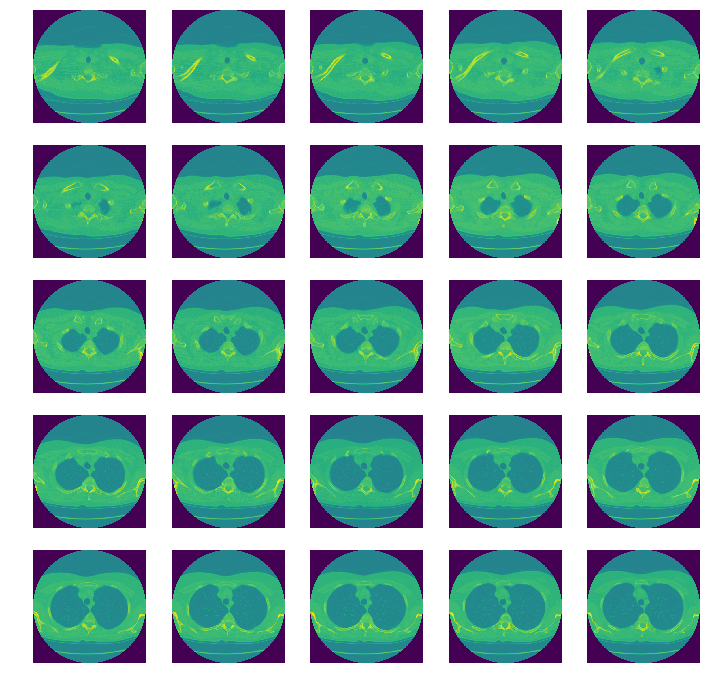

In [28]:
# let's read in a whole bunch of them.
fig,ax = plt.subplots(5,5)
for i in range(5):
    for j in range(5):
        img = dict_dcms[(i*5+j)+1]
        ax[i,j].imshow(img)
        ax[i,j].axis('off')

## Using Functions

A better way to organize our data would be to have a single 3D array.

In [30]:
# Let's create a function to do this.

def dict2array(dict_dcms, path_save=None):
    """
    Converts a dictionary with (InstanceNumber,img) key-value pairs
    into a 3D numpy.ndarray that has that has lower instance numbers
    at the top and higher instance numbers at the bottom.
    INPUTS:
    - dict_dcms: (dictioanry) holds (InstanceNumber,img) for chestCT
    - path_save: (string) directory to save the images.
    OUTPUTS:
    - volCT: (3d.array) width x height x z-axis for chestCT
    """
    img = dict_dcms[1]
    # Initialize the array.
    volCT = np.zeros((img.shape[0], img.shape[1], len(dict_dcms)))
    # Get sorted indices.
    list_inds = sorted(dict_dcms)
    # Loop over sorted indices to put slice into 3d.array.
    for iter_ind, ind in enumerate(list_inds):
        volCT[:,:,iter_ind] = dict_dcms[ind]
        if path_save:
            img = dict_dcms[ind].astype(np.float32)
            img -= np.min(img)
            img /= np.max(img)
            scipy.misc.imsave(join(path_save,str(iter_ind)+'.png'), img)
    # Return array.
    return volCT
    
    
path_save = 'C:\\Users\\yidar\\Desktop\\temp_save'
dict2array(dict_dcms, path_save)

array([[[-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        ..., 
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.]],

       [[-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        ..., 
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.]],

       [[-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        [-2000., -2000., -2000., ..., -2000., -2000., -2000.],
        ..., 
        [